In [1]:
# Copyrighted, Trademarked, and Rigged with Traps by Elliott Tanner
import pandas as pd # Read out the csv data
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as sps
import antigravity # For lightweight code

In [2]:
cd /Users/abbystokes/Desktop

/Users/abbystokes/Desktop


In [3]:
dat=pd.read_table("GalaxyMorphZ.tsv")
np.min(dat["z"])
print(dat.head())

                 objID         z  SVMPython  RFPython
0  1237657190905217072  0.078133          0         0
1  1237657191978959105  0.082131          0         0
2  1237652944249094158  0.083400          0         0
3  1237656496724312079  0.020017          1         1
4  1237657191978959113  0.082439          0         0


In [4]:
num=len(dat) # Total number of galaxies
num1SVM=len(dat[dat["SVMPython"]==1]) # Number of late-type galaxies according to SVM
num0SVM=len(dat[dat["SVMPython"]==0])
num1RF=len(dat[dat["RFPython"]==1]) # Number of late-type galaxies according to RF
num0RF=len(dat[dat["RFPython"]==0])
numDisagree=len(dat[(dat["SVMPython"]==1)^(dat["RFPython"]==1)]) # Number of galaxies where the two algorithms disagree

print("number of late-type SVM: ", num1SVM)
print("number of late-type RF: ", num1RF)
print("number of early-type SVM: ", num0SVM)
print("number of early-type RF: ", num0RF)

print("percent of late-type SVM: ", num1SVM/len(dat))
print("percent of late-type RF: ", num1RF/len(dat))
print("percent of early-type SVM: ", num0SVM/len(dat))
print("percent of early-type RF: ", num0RF/len(dat))

number of late-type SVM:  176362
number of late-type RF:  183842
number of early-type SVM:  139669
number of early-type RF:  132189
percent of late-type SVM:  0.5580528492458018
percent of late-type RF:  0.5817214134056469
percent of early-type SVM:  0.44194715075419816
percent of early-type RF:  0.4182785865943531


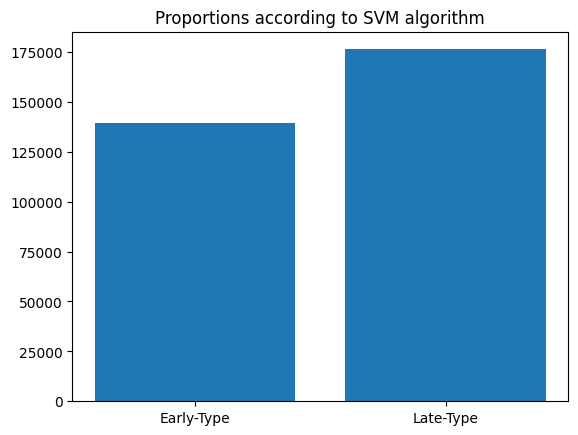

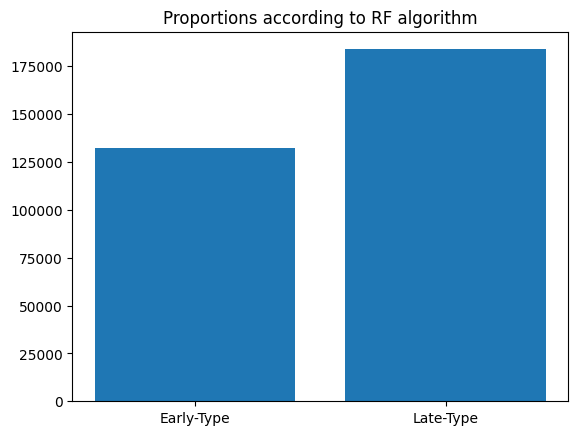

In [5]:
plt.bar(["Early-Type","Late-Type"],[num-num1SVM,num1SVM])
plt.title("Proportions according to SVM algorithm")
plt.show()
plt.bar(["Early-Type","Late-Type"],[num-num1RF,num1RF])
plt.title("Proportions according to RF algorithm")
plt.show()

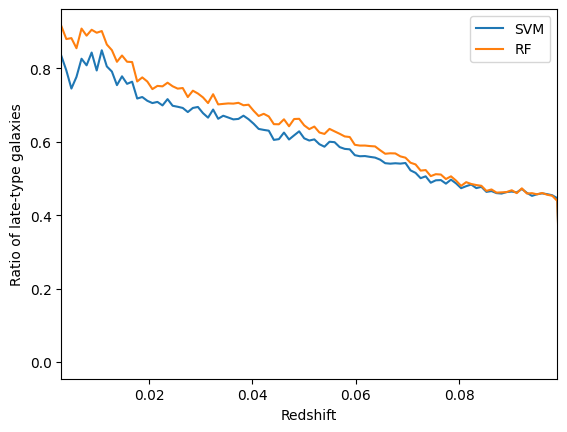

In [6]:
# Just a little noodling around. Might be interesting to look at on my own time.
x=np.linspace(np.min(dat["z"]),np.max(dat["z"]),100)
y1=np.zeros(100)
y2=np.zeros(100)
sep=x[1]-x[0]
for i,z in enumerate(x):
    try:
        y1[i]=len(dat[(dat["SVMPython"]==1)&(dat["z"]>z)&(dat["z"]<z+sep)])/len(dat[(dat["z"]>z)&(dat["z"]<z+sep)])
    except:
        y1[i]=0
for i,z in enumerate(x):
    try:
        y2[i]=len(dat[(dat["RFPython"]==1)&(dat["z"]>z)&(dat["z"]<z+sep)])/len(dat[(dat["z"]>z)&(dat["z"]<z+sep)])
    except:
        y2[i]=0
plt.plot(x,y1,label="SVM")
plt.plot(x,y2,label="RF")
plt.legend()
plt.xlim(x[0],x[-2])
plt.xlabel("Redshift")
plt.ylabel("Ratio of late-type galaxies")
plt.show()

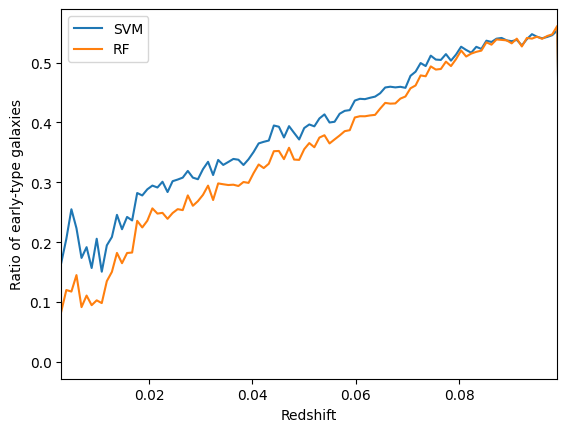

In [7]:
# Just a little noodling around. Might be interesting to look at on my own time.
x=np.linspace(np.min(dat["z"]),np.max(dat["z"]),100)
y1=np.zeros(100)
y2=np.zeros(100)
sep=x[1]-x[0]
for i,z in enumerate(x):
    try:
        y1[i]=len(dat[(dat["SVMPython"]==0)&(dat["z"]>z)&(dat["z"]<z+sep)])/len(dat[(dat["z"]>z)&(dat["z"]<z+sep)])
    except:
        y1[i]=0
for i,z in enumerate(x):
    try:
        y2[i]=len(dat[(dat["RFPython"]==0)&(dat["z"]>z)&(dat["z"]<z+sep)])/len(dat[(dat["z"]>z)&(dat["z"]<z+sep)])
    except:
        y2[i]=0
plt.plot(x,y1,label="SVM")
plt.plot(x,y2,label="RF")
plt.legend()
plt.xlim(x[0],x[-2])
plt.xlabel("Redshift")
plt.ylabel("Ratio of early-type galaxies")
plt.show()